In [ ]:
# TO link colab with google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd

# Load the dataset from an Excel file
file_path = '/content/drive/MyDrive/Colab Notebooks/MinneMUDAC2025/Novice.xlsx'

try:
    # If your file has multiple sheets, you can specify the sheet with sheet_name parameter (e.g., sheet_name=0 or sheet_name='Sheet1')
    df = pd.read_excel(file_path, sheet_name=0)
except Exception as e:
    error = str(e)

# Display the result
if 'df' in locals():
    data_head = df.head()
else:
    data_head = error

print(data_head)


      Match ID 18Char   Stage           Little ID           Big ID  \
0  a1v2J0000028pRvQAI  Closed  0032J00003PLe29QAD  0032J00003PhDOI   
1  a1v2J000002uR0JQAU  Closed  0032J00003PfZ6OQAV  0032J00003PgoV1   
2  a1v2J0000027NsOQAU  Closed  0032J00003PLeoRQAT  0032J00003Ph0MT   
3  a1v2J0000027dtOQAQ  Active  0032J00003PLeoRQAT  0032J00003Ph14N   
4  a1v2J0000028enKQAQ  Closed  0032J00003PfZ6QQAV  0032J00003Ph14j   

   Big County  Big Age              Big Occupation Big: Military  \
0    Hennepin       40                  Unemployed           NaN   
1  Washington       65       Tech: Research/Design           NaN   
2      Ramsey       45                    Military           NaN   
3    Hennepin       61            Finance: Banking           NaN   
4      Ramsey       29  Human Services: Non-Profit           NaN   

  Big Approved Date Big Level of Education  ...  \
0               NaT         Masters Degree  ...   
1        2018-04-11                    NaN  ...   
2               N

In [ ]:
columns_of_interest = ['Match Length', 'Closure Reason', 'Program Type']
df_subset = df[columns_of_interest]

print(df_subset.head())


   Match Length                                   Closure Reason Program Type
0           9.0                                Volunteer: Health    Community
1          46.1  Child/Family: Feels incompatible with volunteer    Community
2           6.2                                 Volunteer: Moved    Community
3          85.6                                              NaN    Community
4          28.3                              Child/Family: Moved    Community


In [ ]:
program_counts = df['Program Type'].value_counts()
print(program_counts)


Program Type
Community                 2420
Site                       570
Site Based Facilitated     282
Site Based Plus              3
Name: count, dtype: int64


In [ ]:
# Create a DataFrame for each Program Type
community_df_subset = df_subset[df_subset['Program Type'] == 'Community']
site_df_subset = df_subset[df_subset['Program Type'] == 'Site']
site_based_facilitated_df_subset = df_subset[df_subset['Program Type'] == 'Site Based Facilitated']
site_based_plus_df_subset = df_subset[df_subset['Program Type'] == 'Site Based Plus']
site_any_df_subset = df_subset[df_subset['Program Type'] != 'Community']

# Display the first few rows of each table
print("Community:")
print(community_df_subset.head())
print("\nSite:")
print(site_df_subset.head())
print("\nSite Based Facilitated:")
print(site_based_facilitated_df_subset.head())
print("\nSite Based Plus:")
print(site_based_plus_df_subset.head())
print("\nSite Any:")
print(site_any_df_subset.head())


Community:
   Match Length                                   Closure Reason Program Type
0           9.0                                Volunteer: Health    Community
1          46.1  Child/Family: Feels incompatible with volunteer    Community
2           6.2                                 Volunteer: Moved    Community
3          85.6                                              NaN    Community
4          28.3                              Child/Family: Moved    Community

Site:
      Match Length                                     Closure Reason  \
2420          43.3                                   Child: Graduated   
2421          17.8             Child/Family: Lost contact with agency   
2422           3.2  Volunteer: Infraction of match rules/agency po...   
2423          26.0                         Volunteer: Time constraint   
2424          28.3                                                NaN   

     Program Type  
2420         Site  
2421         Site  
2422         Si

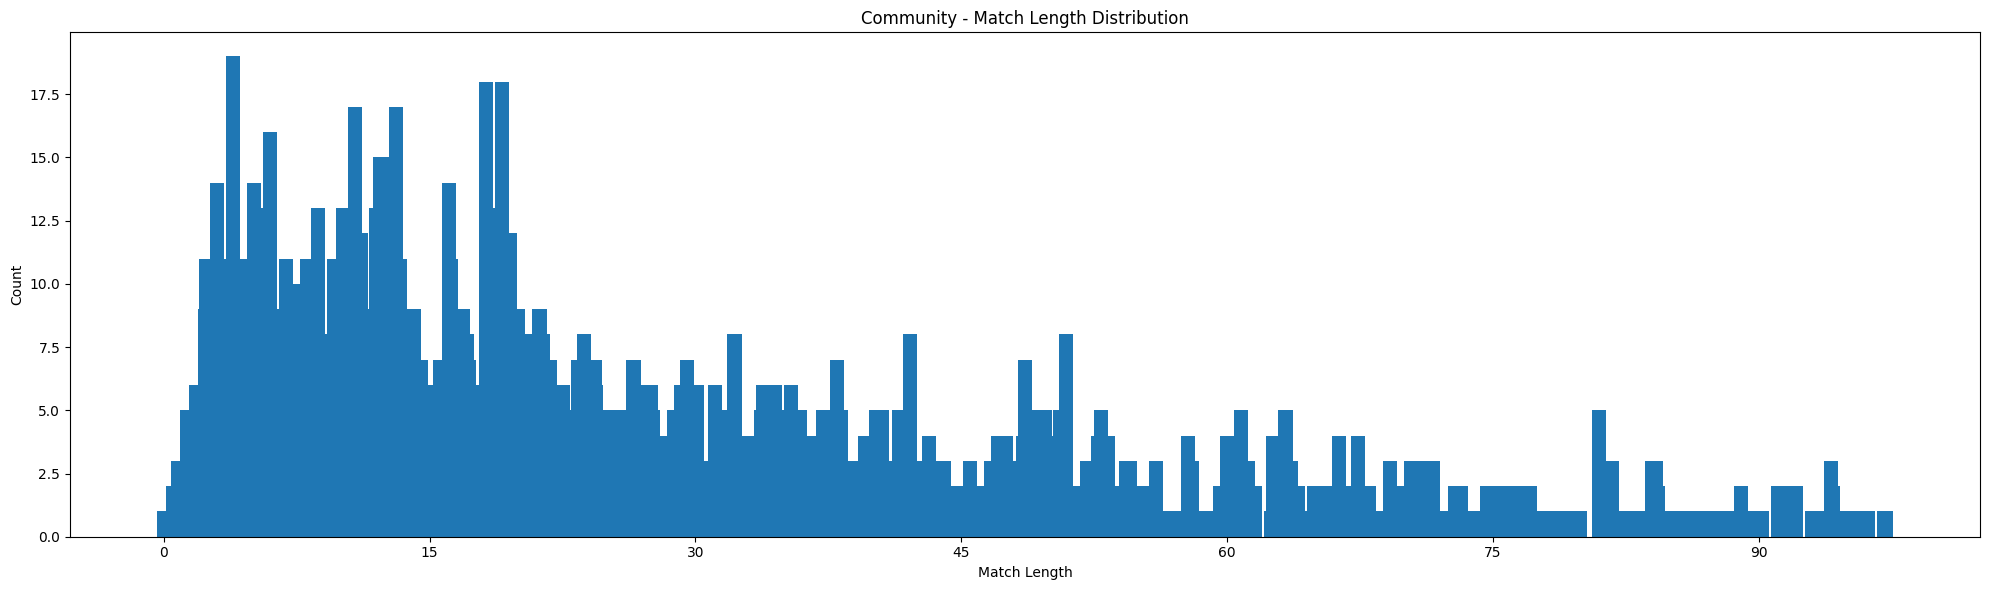

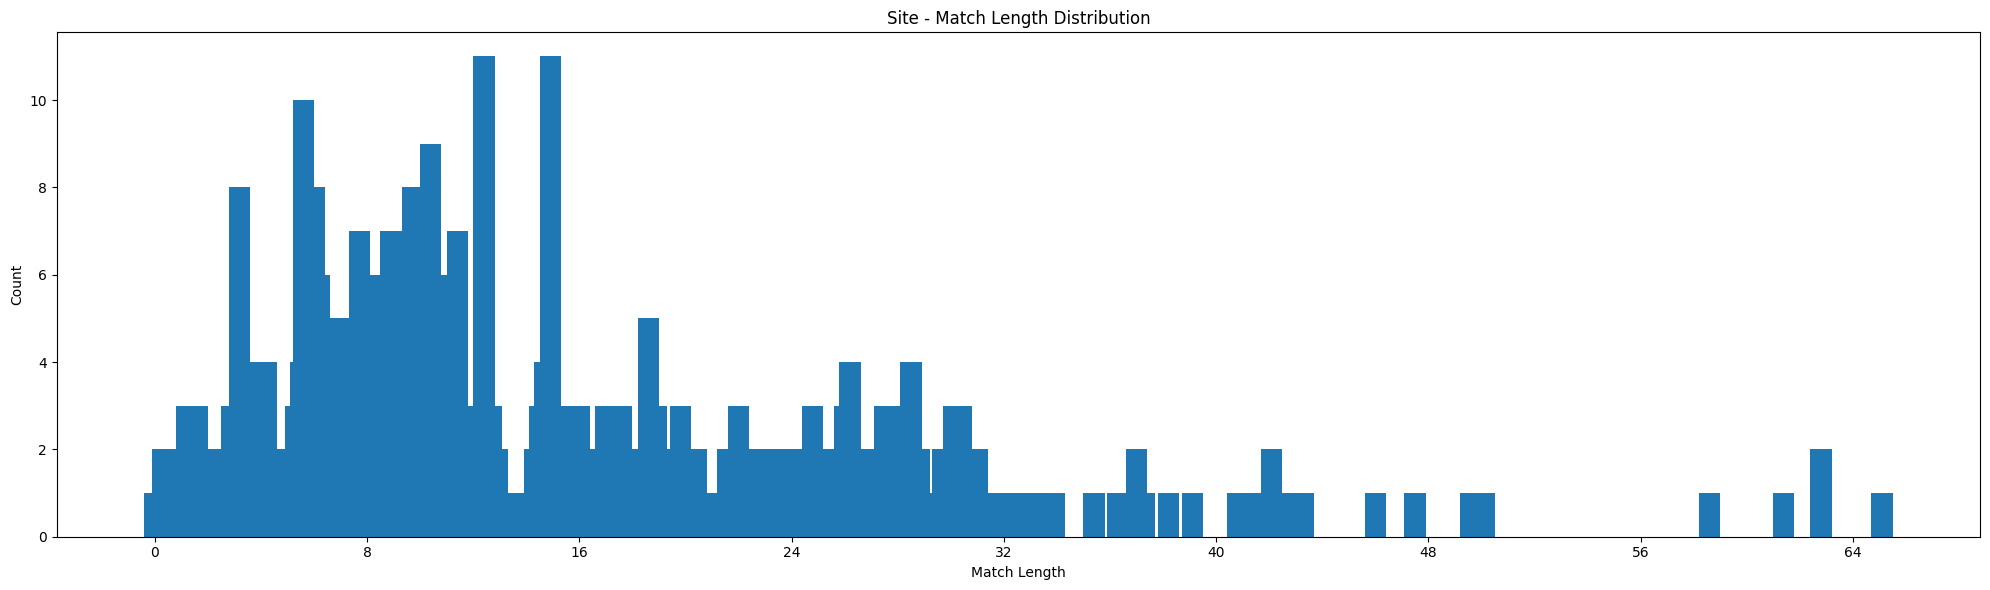

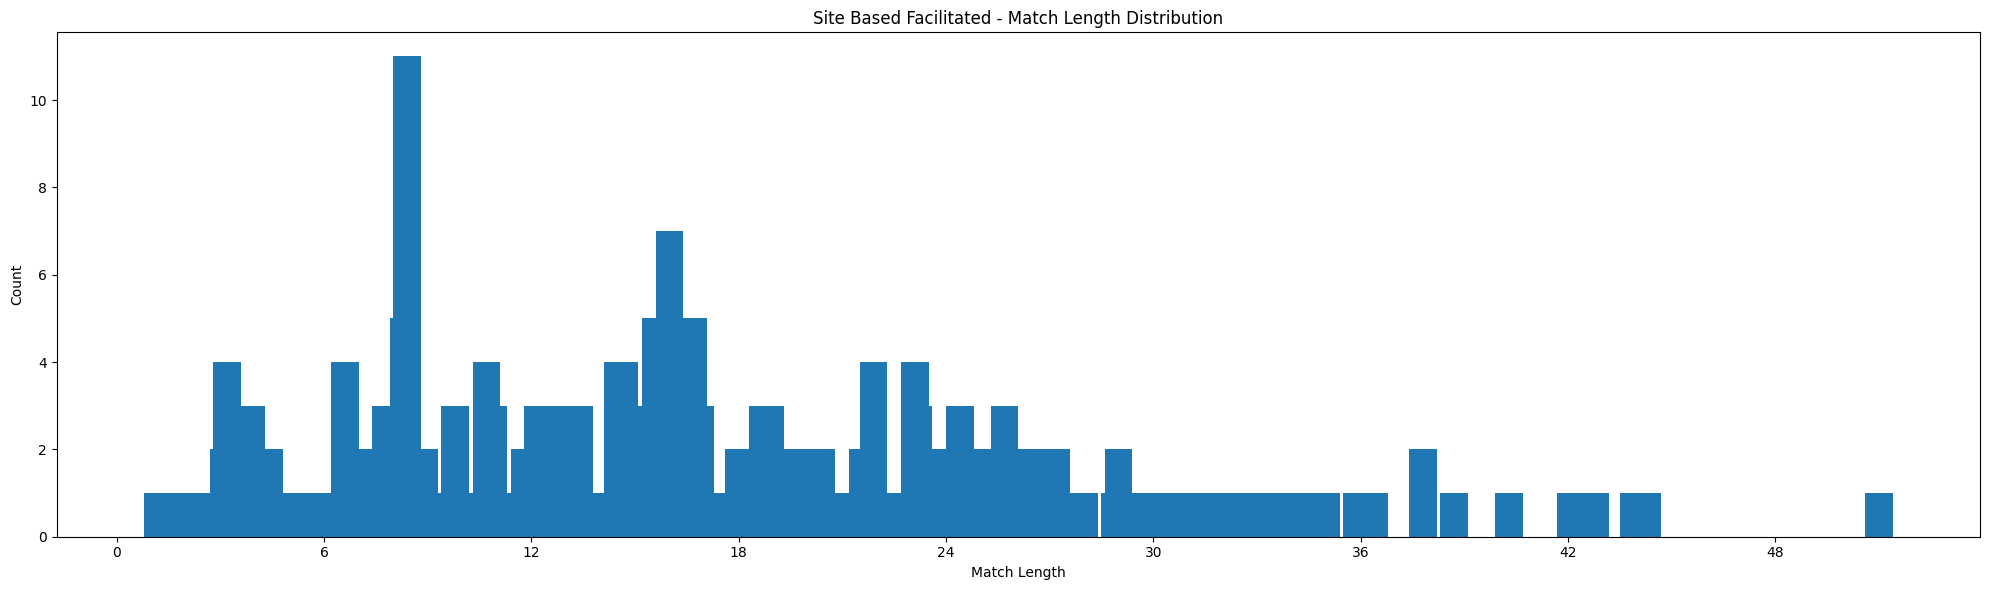

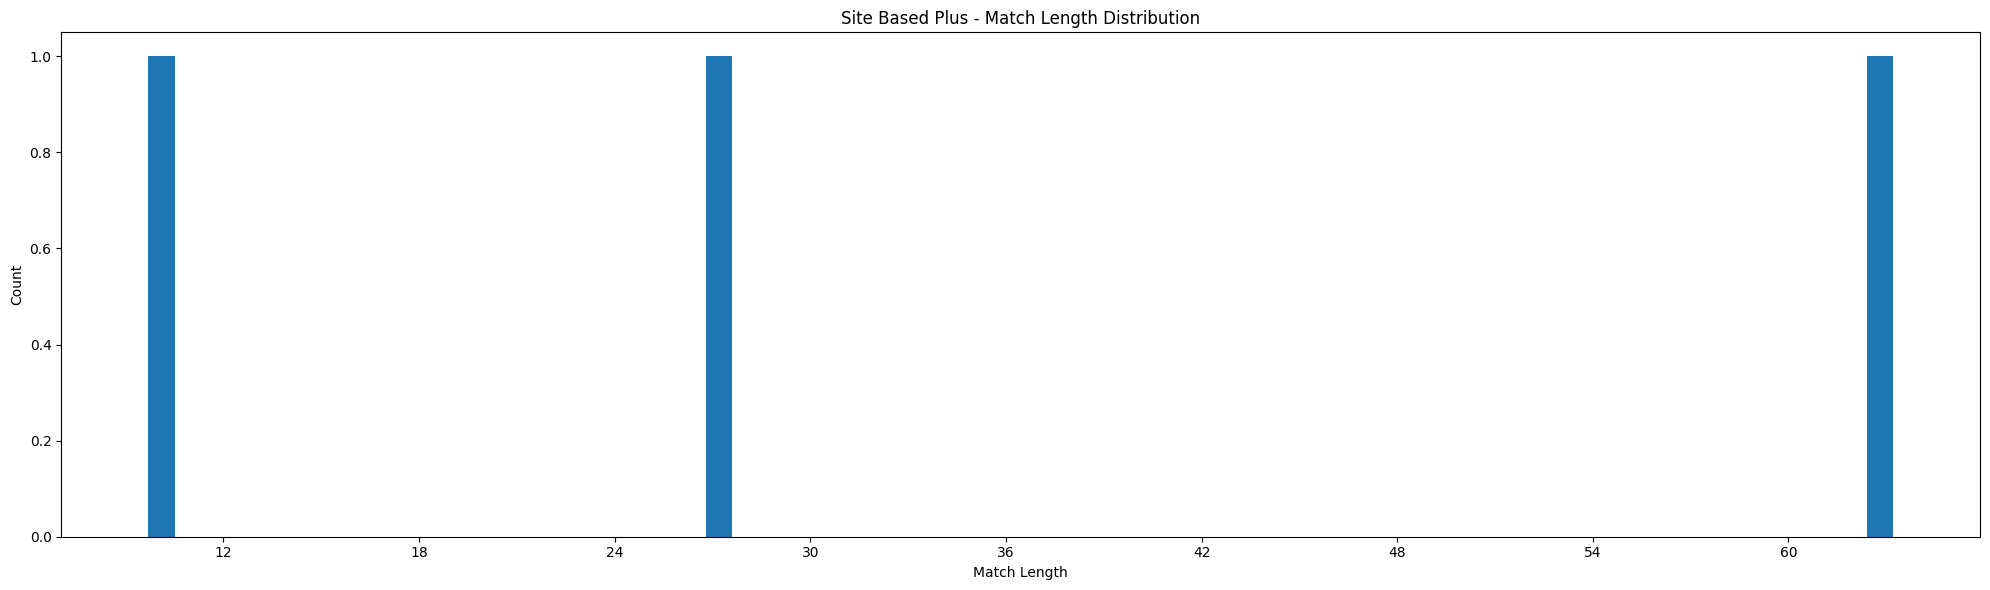

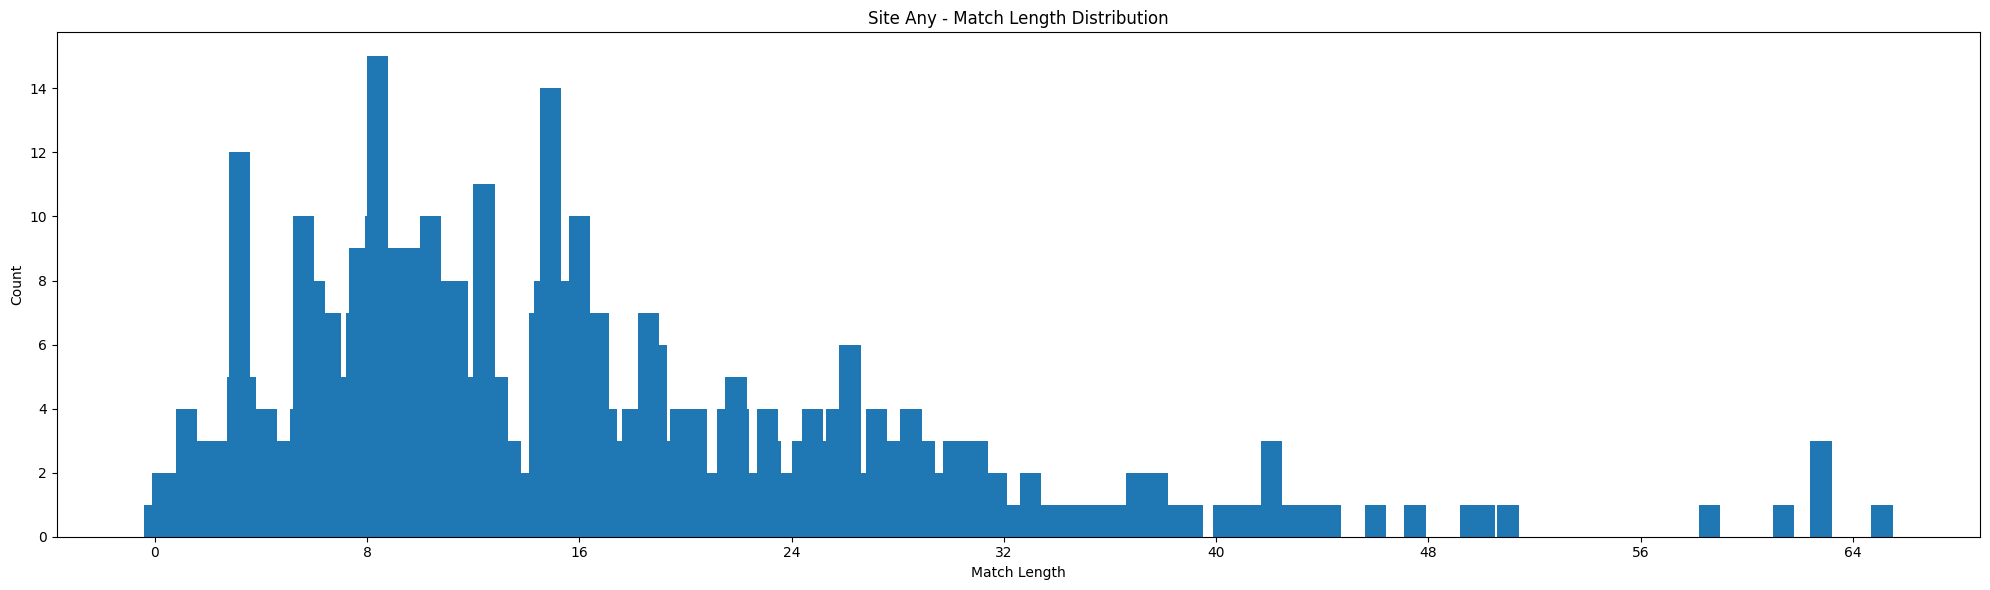

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker

def plot_program_type_match_length_distributions(df_subset, program_type_name):
    # Count unique values for Match Length (sorted by the Match Length values)
    match_length_counts = df_subset['Match Length'].value_counts().sort_index()

    # Create a vertical bar plot using numeric x-values
    plt.figure(figsize=(20, 6))
    plt.bar(match_length_counts.index, match_length_counts.values, width=0.8)
    plt.title(f'{program_type_name} - Match Length Distribution')
    plt.xlabel('Match Length')
    plt.ylabel('Count')

    # Set the x-axis to only display whole integers
    ax = plt.gca()
    ax.xaxis.set_major_locator(mticker.MaxNLocator(integer=True))

    plt.tight_layout()
    plt.show()

plot_program_type_match_length_distributions(community_df_subset, 'Community')
plot_program_type_match_length_distributions(site_df_subset, 'Site')
plot_program_type_match_length_distributions(site_based_facilitated_df_subset, 'Site Based Facilitated')
plot_program_type_match_length_distributions(site_based_plus_df_subset, 'Site Based Plus')
plot_program_type_match_length_distributions(site_any_df_subset, 'Site Any')


**Based on Program Types, the Match Lengths are all very similar, with most of them being on the shorter side. Added a graph with all "Site..." data together, since I suspect them to be meant as the same category.**

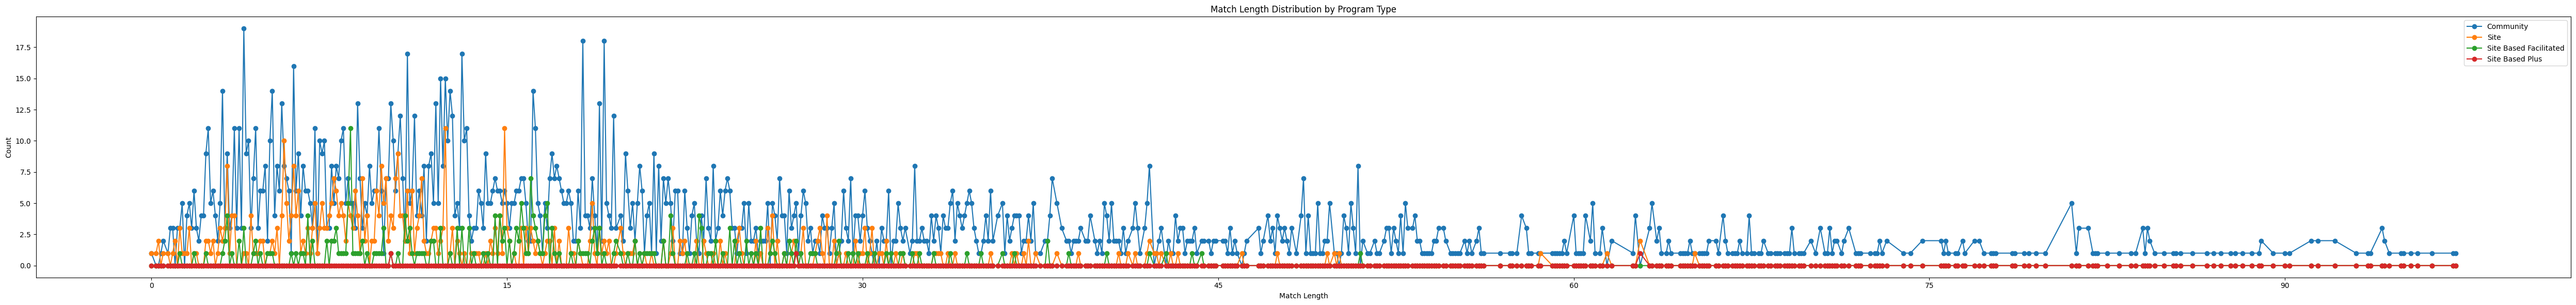

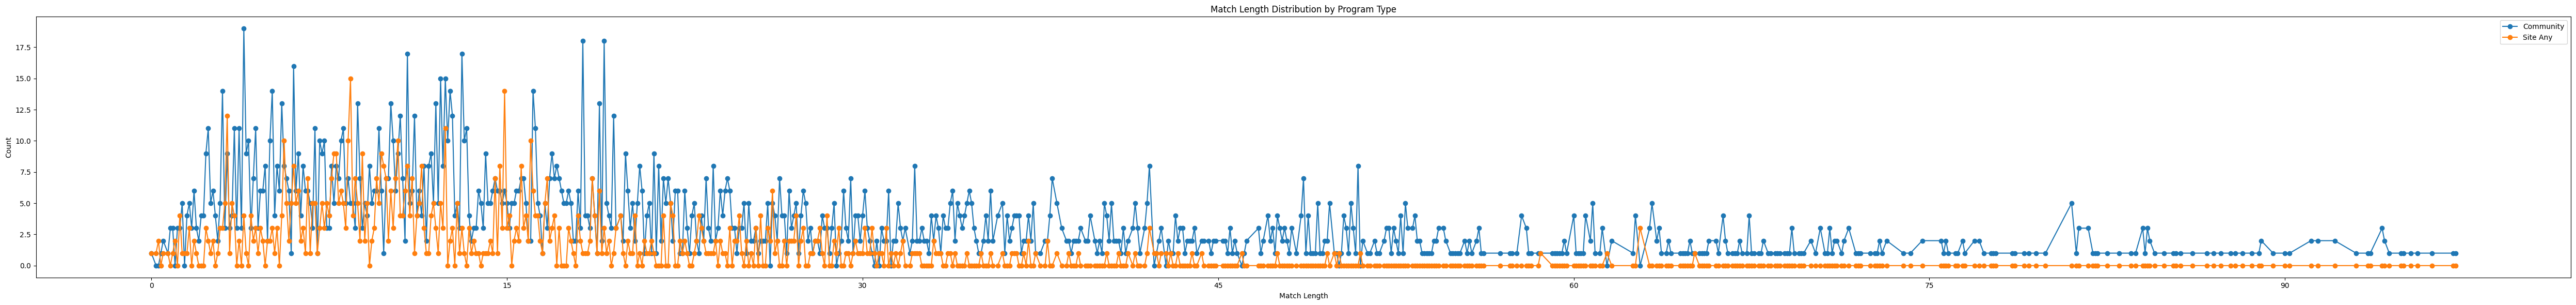

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker

def plot_line_graph_match_length(df_subsets, labels):
    """
    Plots a line graph showing the match length distribution for each provided DataFrame subset.

    Parameters:
      df_subsets (list of pd.DataFrame): List of DataFrame subsets.
      labels (list of str): Corresponding labels for each DataFrame subset.
    """
    # Compute the match length counts for each subset and store in a dictionary
    counts_dict = {}
    for label, df in zip(labels, df_subsets):
        counts = df['Match Length'].value_counts().sort_index()
        counts_dict[label] = counts

    # Create a common x-axis: union of all match lengths from the subsets
    all_x = sorted(set().union(*(set(series.index) for series in counts_dict.values())))

    plt.figure(figsize=(50, 6))

    # Plot each subset's match length distribution as a line with markers
    for label, counts in counts_dict.items():
        y_vals = [counts.get(x, 0) for x in all_x]  # Get count for each match length, defaulting to 0
        plt.plot(all_x, y_vals, marker='o', label=label)

    plt.title('Match Length Distribution by Program Type')
    plt.xlabel('Match Length')
    plt.ylabel('Count')
    plt.legend()
    plt.gca().xaxis.set_major_locator(mticker.MaxNLocator(integer=True))  # Ensure x-axis has whole numbers
    plt.tight_layout()
    plt.show()

# Example usage:
# Case 1: Four subsets (Community, Site, Site Based Facilitated, Site Based Plus)
df_subsets = [community_df_subset, site_df_subset, site_based_facilitated_df_subset, site_based_plus_df_subset]
labels = ['Community', 'Site', 'Site Based Facilitated', 'Site Based Plus']
plot_line_graph_match_length(df_subsets, labels)

# Case 2: Two subsets (Community and Site Any)
df_subsets = [community_df_subset, site_any_df_subset]
labels = ['Community', 'Site Any']
plot_line_graph_match_length(df_subsets, labels)


**Here's the data as a line graph and overlaid on each other to compare at once. Overall, there are more Community matches than Site matches, and the longer matches is dominated by Community matches.**

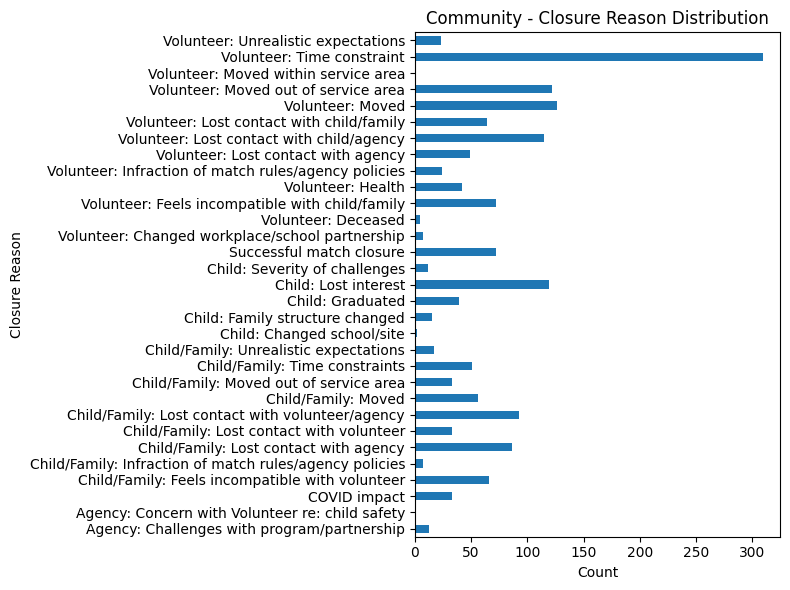

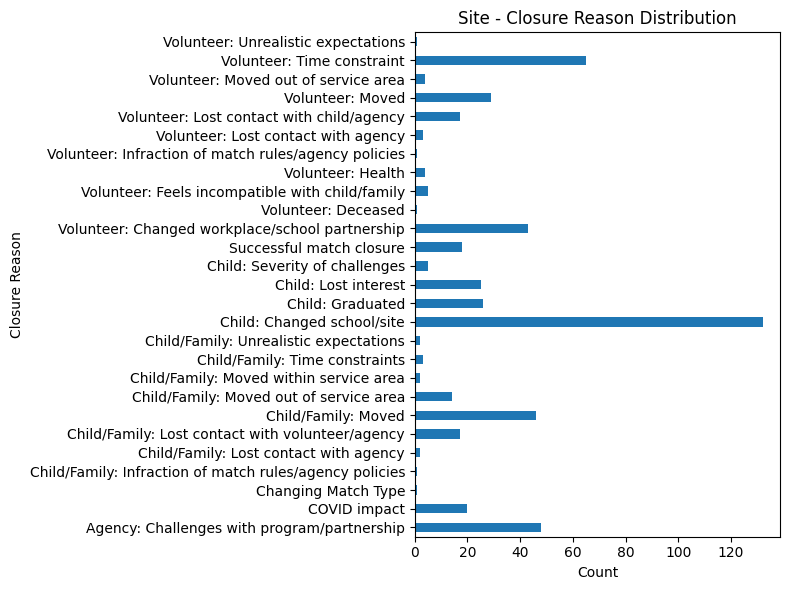

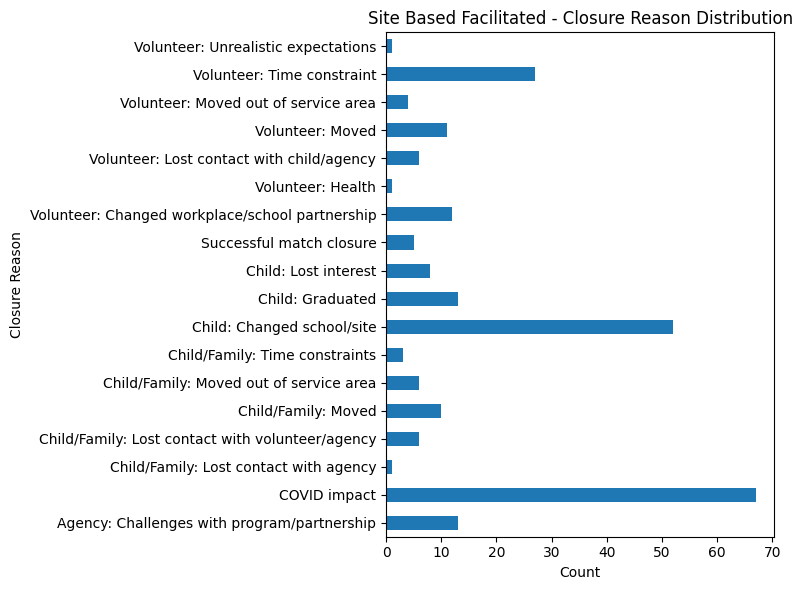

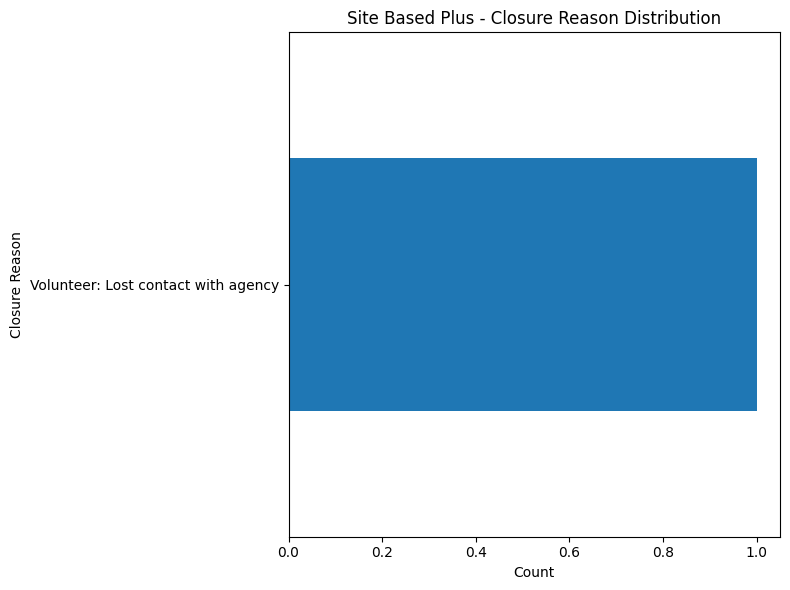

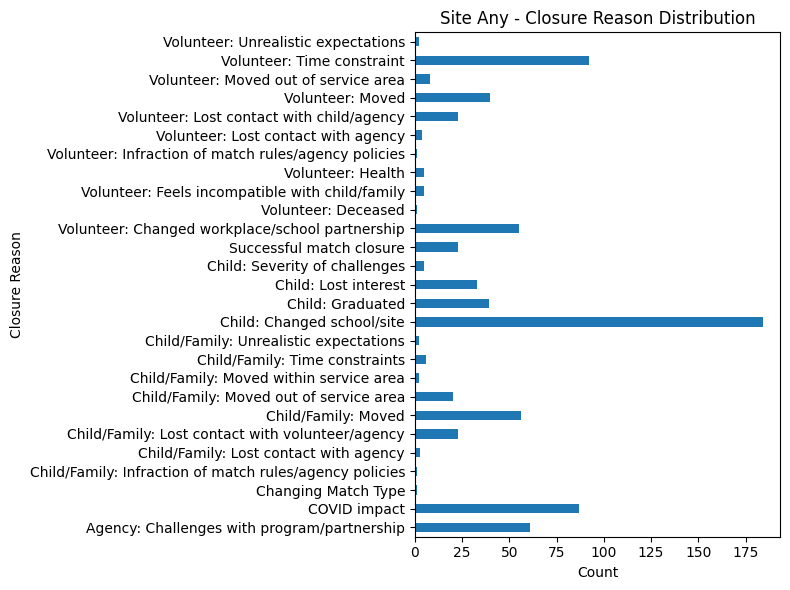

In [ ]:
import matplotlib.pyplot as plt

def plot_program_type_closure_reason_distributions(df_subset, program_type_name):
    # Count unique values for Closure Reason (sorted by the Closure Reason values)
    closure_reason_counts = df_subset['Closure Reason'].value_counts().sort_index()

    # Plot horizontal bar graph for Closure Reason
    plt.figure(figsize=(8, 6))
    closure_reason_counts.plot(kind='barh')
    plt.title(f'{program_type_name} - Closure Reason Distribution')
    plt.xlabel('Count')
    plt.ylabel('Closure Reason')
    plt.tight_layout()
    plt.show()

plot_program_type_closure_reason_distributions(community_df_subset, 'Community')
plot_program_type_closure_reason_distributions(site_df_subset, 'Site')
plot_program_type_closure_reason_distributions(site_based_facilitated_df_subset, 'Site Based Facilitated')
plot_program_type_closure_reason_distributions(site_based_plus_df_subset, 'Site Based Plus')
plot_program_type_closure_reason_distributions(site_any_df_subset, 'Site Any')


**For Closure Reasons, Community matches tend to be closed by problems from the Volunteer's side, while Site matches tend to be closed due to problems from the Chiild/Family's side.**

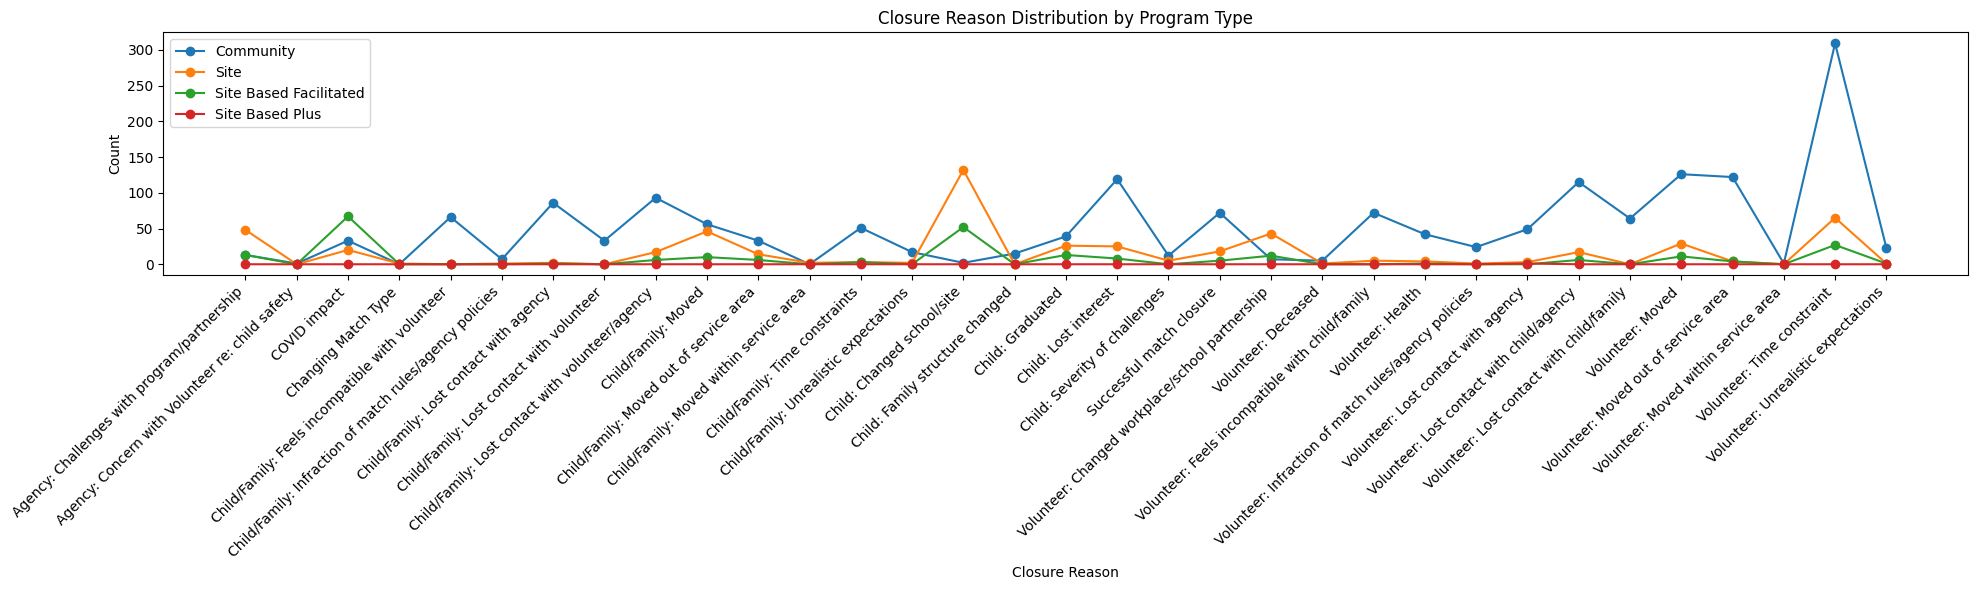

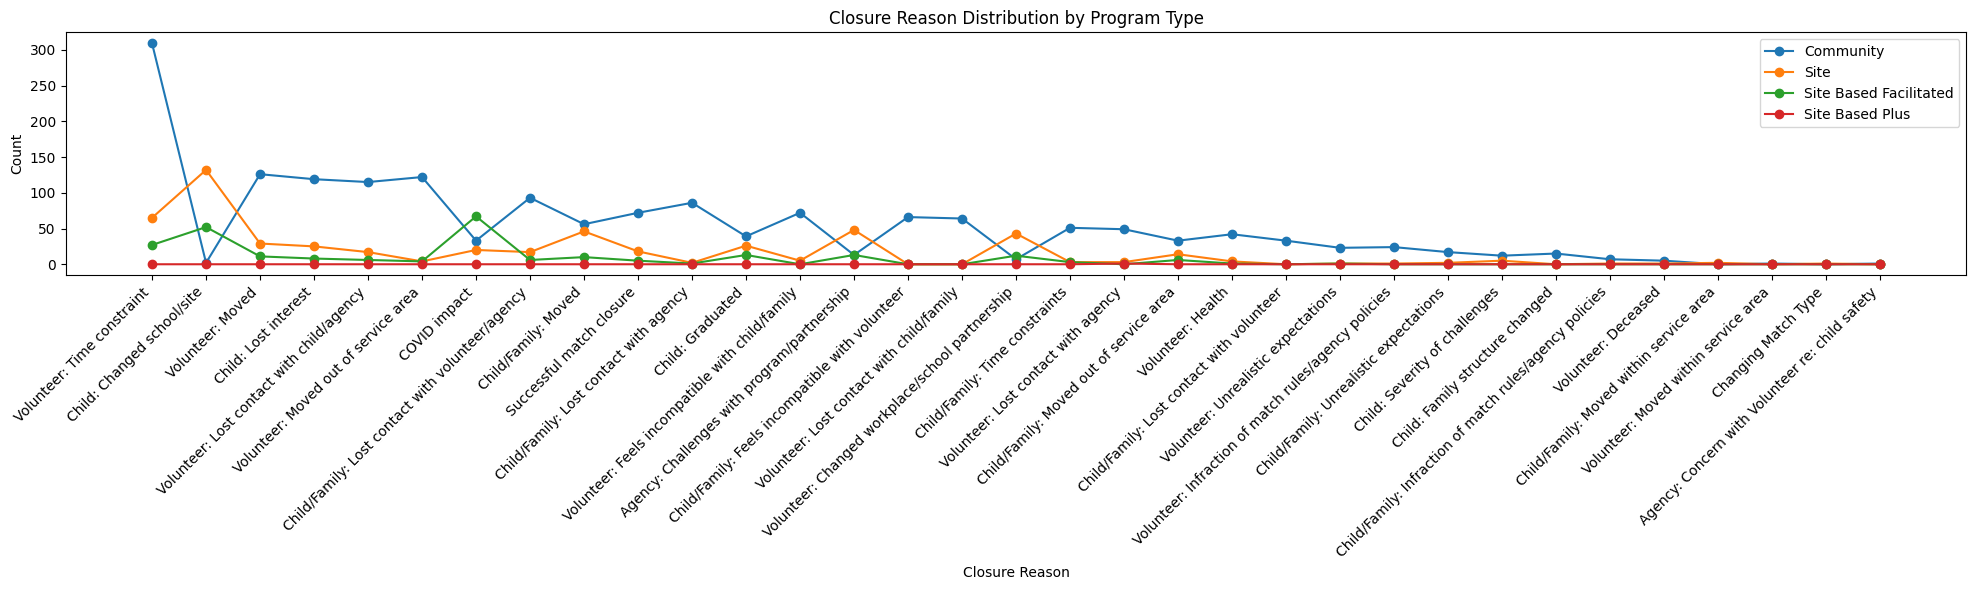

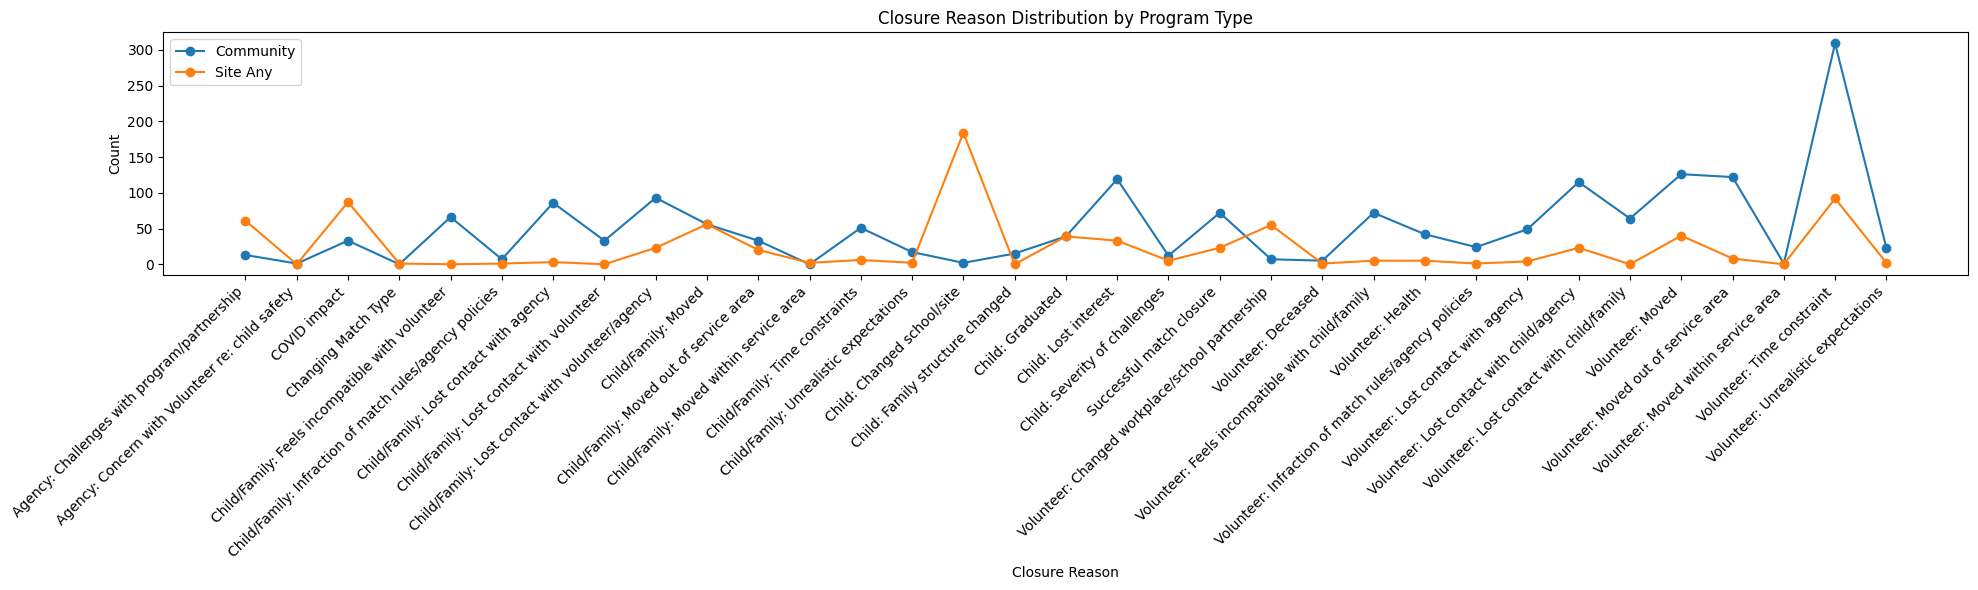

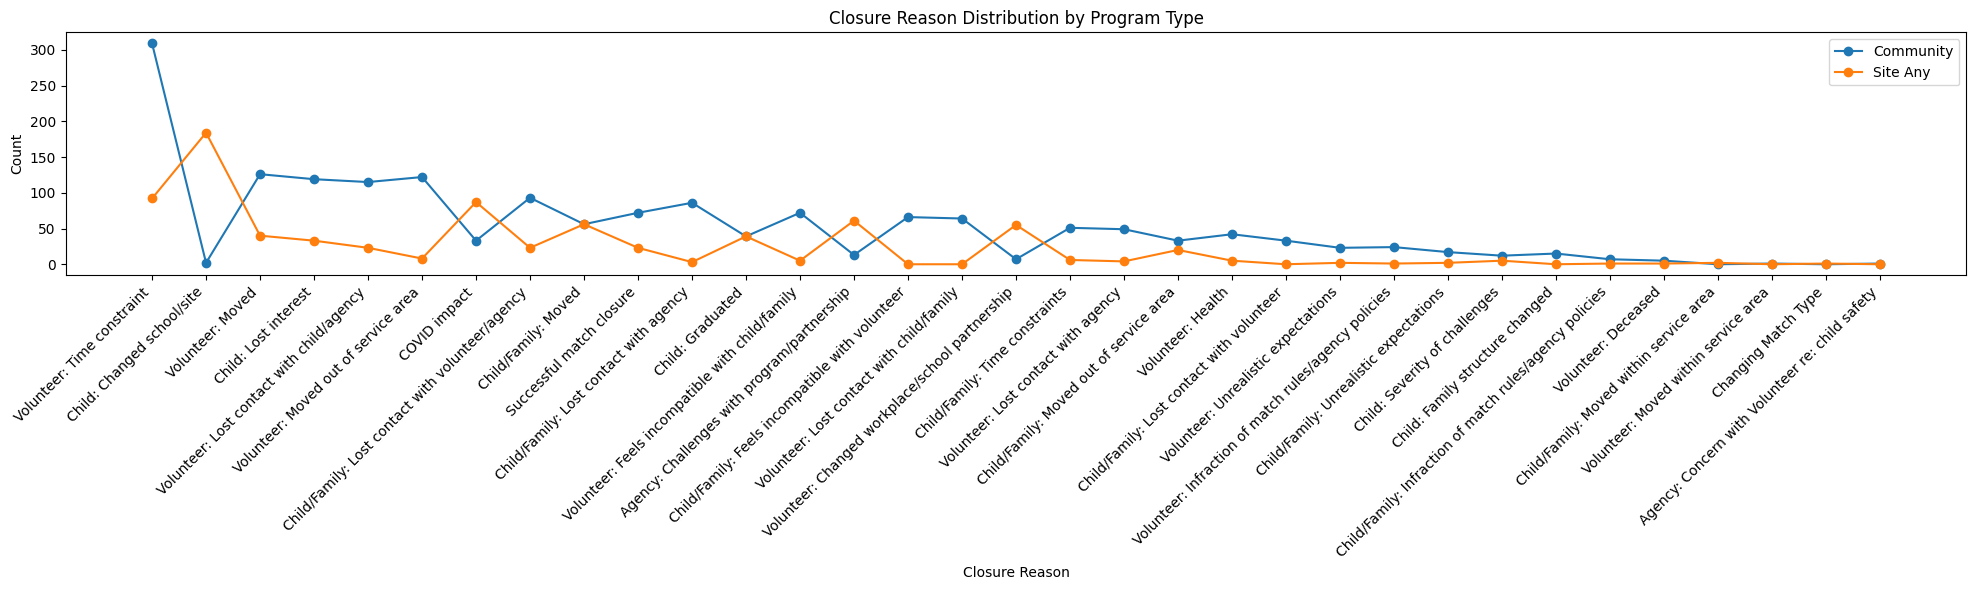

In [ ]:
import matplotlib.pyplot as plt

def plot_line_graph_closure_reason(df_subsets, labels, sort_by='alphabetical'):
    """
    Plots a line graph showing the closure reason distribution for each provided DataFrame subset.
    The x-axis will use the full closure reason string values.

    Parameters:
      df_subsets (list of pd.DataFrame): List of DataFrame subsets.
      labels (list of str): Corresponding labels for each DataFrame subset.
      sort_by (str): Sorting order for the closure reason x-axis labels.
                     Options:
                       'alphabetical' - sort labels alphabetically.
                       'descending'   - sort labels in descending order of overall counts.
    """
    # Compute closure reason counts for each subset
    counts_dict = {}
    for label, df in zip(labels, df_subsets):
        counts = df['Closure Reason'].value_counts()
        counts_dict[label] = counts

    # Determine the union of all closure reasons across the subsets
    all_reasons = set().union(*(set(counts.index) for counts in counts_dict.values()))

    # Sort the closure reasons based on the sort_by parameter
    if sort_by == 'alphabetical':
        sorted_reasons = sorted(all_reasons)
    elif sort_by == 'descending':
        overall_counts = {reason: sum(counts_dict[label].get(reason, 0) for label in labels)
                          for reason in all_reasons}
        sorted_reasons = sorted(all_reasons, key=lambda r: overall_counts[r], reverse=True)
    else:
        sorted_reasons = sorted(all_reasons)  # fallback to alphabetical

    plt.figure(figsize=(20, 6))

    # Plot each subset's closure reason distribution as a line with markers
    # Using the full closure reason strings as the x-axis values
    for label, counts in counts_dict.items():
        y_vals = [counts.get(reason, 0) for reason in sorted_reasons]
        plt.plot(sorted_reasons, y_vals, marker='o', label=label)

    plt.title('Closure Reason Distribution by Program Type')
    plt.xlabel('Closure Reason')
    plt.ylabel('Count')
    plt.legend()
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()


# Example usage:
# Case 1: Four subsets (Community, Site, Site Based Facilitated, Site Based Plus)
df_subsets = [community_df_subset, site_df_subset, site_based_facilitated_df_subset, site_based_plus_df_subset]
labels = ['Community', 'Site', 'Site Based Facilitated', 'Site Based Plus']
plot_line_graph_closure_reason(df_subsets, labels, 'alphabetical')
plot_line_graph_closure_reason(df_subsets, labels, 'descending')

# Case 2: Two subsets (Community and Site Any)
df_subsets = [community_df_subset, site_any_df_subset]
labels = ['Community', 'Site Any']
plot_line_graph_closure_reason(df_subsets, labels, 'alphabetical')
plot_line_graph_closure_reason(df_subsets, labels, 'descending')

**The largest reason any match is closed is ue to the time constraint for the volunteer, but barely any match is closed due to the Agency's concern regarding their Little's safety.**